In [1]:
# Imports
import requests
import os
import json
from dotenv import load_dotenv

import pandas as pd
import numpy as np
import matplotlib as plt


In [2]:
# Load .env environment variables
load_dotenv()

# Set RAPID API key
# my_rapid_api_key = os.getenv("RAPID_API_KEY")

True

In [3]:
# Define function to use Shazam Core API

def get_chart_genre(querystring):

    url = "https://shazam-core.p.rapidapi.com/v1/charts/genre-world"

    headers = {
    'x-rapidapi-host': "shazam-core.p.rapidapi.com",
    'x-rapidapi-key': my_rapid_api_key
    }

    response = requests.request("GET", url, headers=headers, params=querystring)

    return response.json()

In [4]:
# Define function to use Shazam Core API

def get_lyrics(querystring):

    url = "https://shazam-core.p.rapidapi.com/v1/tracks/details"

    headers = {
    'x-rapidapi-host': "shazam-core.p.rapidapi.com",
    'x-rapidapi-key': my_rapid_api_key
    }

    response = requests.request("GET", url, headers=headers, params=querystring)

    return response.json()

In [5]:
# Use 'Track details' endpoint to retrieve lyrics for a single track

genre = 'ROCK'
limit_songs = 50
country = 'US'

querystring = {"rock_code":country,"genre_code":genre,"limit":limit_songs}
chart_response = get_chart_genre(querystring)

NameError: name 'my_rapid_api_key' is not defined

In [ ]:
# Retrieve Track IDs

track_ids=[] # song identifier
titles = [] # song name
subtitles = [] # Main artist and featured artists

for track in range(len(chart_response)):
    track_ids.append(chart_response[track]['id'])
    titles.append(chart_response[track]['title'])
    subtitles.append(chart_response[track]['subtitle'])

print(f"The number of songs retrieved is : {len(track_ids)}")

chart_songs = pd.DataFrame({"Track Name": titles, "Artists": subtitles, 'TrackIDs': track_ids}).set_index('TrackIDs')
chart_songs.head(5)

KeyError: 0

<AxesSubplot:title={'center':'Rock Top Charts'}, xlabel='Artists'>

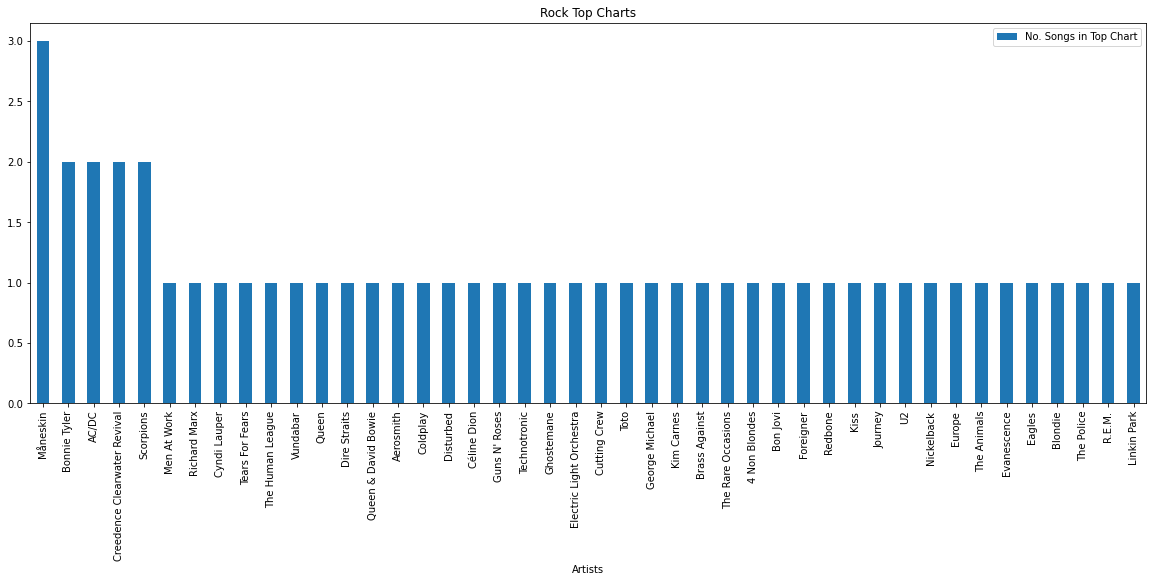

In [ ]:
# Look at the data

from collections import Counter

artists_list = list(chart_songs.Artists)
artist_counts = {artist: artists_list.count(artist) for artist in artists_list} #dict with frequency of artist in top chart

artists_df = pd.DataFrame(list(artist_counts.items()),columns = ['Artists','No. Songs in Top Chart']).set_index('Artists')
artists_df.sort_values(by = 'No. Songs in Top Chart', ascending=False, inplace=True) #sort values

artists_df.plot.bar(figsize =(20, 7), title = 'Rock Top Charts')

In [ ]:
# Retrieve Lyrics for all TrackIDs

track_ids  # the list created in "Search for top songs in Genre" section is required

lyrics=[]

for trackID in track_ids:
    querystring = {"track_id":trackID}
    track_details_response = get_lyrics(querystring)

    if track_details_response['sections'][1]['type'] != "LYRICS":  # Note: tracks with a type != "LYRICS" don't contain lyrics
        lyrics.append([''])
    else:
        track_lyrics = track_details_response['sections'][1]['text']
        lyrics.append(track_lyrics)

In [ ]:
# Add lyrics column to dataframe with chart songs

all_lyrics = pd.Series(" ".join(map(str,song)) for song in lyrics) #each song is stored as a list, this turns each list into a string
all_lyrics_df = pd.DataFrame({"Lyrics": all_lyrics, "Track IDs": track_ids}).set_index('Track IDs')

lyrics_df = pd.concat([chart_songs, all_lyrics_df], axis=1)
lyrics_df.head(5)

NameError: name 'lyrics' is not defined

In [ ]:
lyrics_df

NameError: name 'lyrics_df' is not defined

In [ ]:
#Remove empty lyrics
new_lyrics_df = lyrics_df.drop(
    [

        '55512362', 
        '5167763', 
        '40395814',
        '215540',
        '590307681'
        
    ]
)
new_lyrics_df

NameError: name 'lyrics_df' is not defined

In [ ]:
new_lyrics_df.describe()

NameError: name 'new_lyrics_df' is not defined

# Tokenizer
In this section, I will use NLTK and Python to tokenize the text. This will include:

- Lowercase each word
- Remove Punctuation
- Remove Stopwords

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk

In [ ]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
def tokenizer(Lyrics):
    """Tokenizes text."""
    # Create a list of the words
    words_tokened = word_tokenize(Lyrics)

    # Convert the words to lowercase
    words_lowered = [word.lower() for word in words_tokened]

    # Remove the punctuation
    regex = re.compile('[^a-zA-Z]')
    words_regexed = [regex.sub('', word) for word in words_lowered]
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    sw_add_ons = ['','the', 'a', 'at', 'ca', 'for', 'above', 'on', 'is', 'all', 'ai', 'nt', 'wan', 'na', 'uh', 'ay', 'ta', 'shit', 'fuck', 'bitch', 'fucked', 'pussy', 'hoe', 'motherfucker', 'bitches', 'christmas', 'get', 'oh', 'yeah', 'know', 'every', 'come']
    stopwords_removed = [word.lower() for word in words_regexed if word not in sw.union(sw_add_ons)]

    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in stopwords_removed]

    return tokens

In [ ]:
# Create a new tokens column for lyrics
lyrics_tokens = [tokenizer(words) for words in new_lyrics_df['Lyrics']]
new_lyrics_df['Tokens'] = lyrics_tokens
new_lyrics_df.head()

,Track Name,Artists,Lyrics,Tokens
385334817,Beggin,Måneskin,"Put your loving hand out, baby 'Cause I'm begg...","[put, loving, hand, baby, cause, beggin, beggi..."
40087819,Careless Whisper,George Michael,I feel so unsure As I take your hand And lea...,"[feel, unsure, take, hand, lead, dance, floor,..."
424639477,Wake Up,Brass Against,COME ON!! Come on Although ya try to discred...,"[although, ya, try, discredit, ya, still, neve..."
324979393,Notion,The Rare Occasions,"Sure it's a calming notion, perpetual in motio...","[sure, calming, notion, perpetual, motion, nee..."
11267224,What's Up?,4 Non Blondes,Twenty-five years and my life is still Trying ...,"[twentyfive, year, life, still, trying, great,..."


In [ ]:
new_lyrics_df[['Lyrics', 'Tokens']]

,Lyrics,Tokens
385334817,"Put your loving hand out, baby 'Cause I'm begg...","[put, loving, hand, baby, cause, beggin, beggi..."
40087819,I feel so unsure As I take your hand And lea...,"[feel, unsure, take, hand, lead, dance, floor,..."
424639477,COME ON!! Come on Although ya try to discred...,"[although, ya, try, discredit, ya, still, neve..."
324979393,"Sure it's a calming notion, perpetual in motio...","[sure, calming, notion, perpetual, motion, nee..."
11267224,Twenty-five years and my life is still Trying ...,"[twentyfive, year, life, still, trying, great,..."
560227366,"I wanna be your slave, I wanna be your master ...","[slave, master, make, heartbeat, run, like, ro..."
20145089,Once upon a time not so long ago Tommy used to...,"[upon, time, long, ago, tommy, used, work, doc..."
5884434,I've gotta take a little time A little time to...,"[got, take, little, time, little, time, think,..."
229461461,Come and get your love Come and get your love ...,"[love, love, love, love, hail, hail, matter, h..."
300776902,"Mmm, yeah! Tonight, I want to give it all to ...","[mmm, tonight, want, give, darkness, much, wan..."


# Sentiment Analysis Using Vader

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Akyon\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [ ]:
# Sentiment scores dictionaries
lyrics_sent = {
    "lyrics_compound": [],
    "lyrics_pos": [],
    "lyrics_neu": [],
    "lyrics_neg": [],
    "lyrics_sent": [],
}

# Get sentiment for the lyrics
for index, row in new_lyrics_df.iterrows():
    try:
        # Sentiment scoring with VADER
        lyrics_sentiment = analyzer.polarity_scores(row["Lyrics"])
        lyrics_sent["lyrics_compound"].append(lyrics_sentiment["compound"])
        lyrics_sent["lyrics_pos"].append(lyrics_sentiment["pos"])
        lyrics_sent["lyrics_neu"].append(lyrics_sentiment["neu"])
        lyrics_sent["lyrics_neg"].append(lyrics_sentiment["neg"])
        lyrics_sent["lyrics_sent"].append(get_sentiment(lyrics_sentiment["compound"]))

    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
lyrics_sentiment_df = pd.DataFrame(lyrics_sent)

# new_lyrics_df = new_lyrics_df.join(lyrics_sentiment_df)

# new_lyrics_df.head()
result_lyrics_df = pd.concat([new_lyrics_df, lyrics_sentiment_df], axis=1)
result_lyrics_df

,Track Name,Artists,Lyrics,Tokens,lyrics_compound,lyrics_pos,lyrics_neu,lyrics_neg,lyrics_sent
0,NaN,NaN,NaN,NaN,0.9972,0.306,0.656,0.038,1.0
1,NaN,NaN,NaN,NaN,-0.6213,0.166,0.662,0.172,-1.0
2,NaN,NaN,NaN,NaN,-0.9038,0.098,0.788,0.114,-1.0
3,NaN,NaN,NaN,NaN,0.5282,0.162,0.708,0.130,1.0
4,NaN,NaN,NaN,NaN,0.9709,0.154,0.787,0.059,1.0
...,...,...,...,...,...,...,...,...,...
56670613,Bohemian Rhapsody,Queen,Is this the real life? Is this just fantasy? C...,"[real, life, fantasy, caught, landslide, escap...",NaN,NaN,NaN,NaN,NaN
586288497,MAMMAMIA,Måneskin,"Oh, oh, oh, oh Oh, mamma mia-ma, ma-mamma mia-...","[mamma, miama, mamamma, miaah, feel, heat, fee...",NaN,NaN,NaN,NaN,NaN
5884434,I Want To Know What Love Is,Foreigner,I've gotta take a little time A little time to...,"[got, take, little, time, little, time, think,...",NaN,NaN,NaN,NaN,NaN
5886125,The Final Countdown,Europe,We're leaving together But still it's farewell...,"[leaving, together, still, farewell, maybe, ba...",NaN,NaN,NaN,NaN,NaN


### Analyzing Sentiments of Lyrics

In [ ]:
# import plotly.express as px

import plotly.express as px

# Plot overall sentiment scores for genre

positives = result_lyrics_df['lyrics_sent'].loc[result_lyrics_df['lyrics_sent'] == 1 ].count()
negatives = result_lyrics_df['lyrics_sent'].loc[result_lyrics_df['lyrics_sent'] == -1 ].count()
index_names = ['Positive', 'Negative']

lyrics_sentiment = pd.DataFrame([positives,negatives], columns = ['Count'])
lyrics_sentiment.index = index_names

rock_sentiment = px.pie(
    lyrics_sentiment, 
    values = 'Count', 
    names=index_names, 
    hole = 0.4, 
    color_discrete_sequence=["green", "red"],
    width=1000, 
    height = 500,
    title='Overall Sentiment for Rock Song Lyrics'
    )  
rock_sentiment

In [ ]:
# Describe lyrics sentiment
result_lyrics_df.describe()

,lyrics_compound,lyrics_pos,lyrics_neu,lyrics_neg,lyrics_sent
count,45.000000,45.000000,45.000000,45.000000,45.000000
mean,0.445504,0.160578,0.761089,0.078333,0.466667
std,0.786971,0.096122,0.102467,0.058979,0.894427
min,-0.989700,0.036000,0.516000,0.000000,-1.000000
25%,-0.479800,0.084000,0.701000,0.036000,-1.000000
50%,0.967200,0.141000,0.787000,0.069000,1.000000
75%,0.992500,0.221000,0.836000,0.114000,1.000000
max,0.999700,0.439000,0.943000,0.248000,1.000000


# NGrams and Frequency Analysis
In this section there are the ngrams and word frequency for lyrics.

Use NLTK to produce the n-grams for N = 2.

In [ ]:
from collections import Counter
from nltk import ngrams

In [ ]:
# Generate the Bitcoin N-grams where N=2
lyrics_text = ' '.join(new_lyrics_df["Lyrics"])
lyrics_processed = tokenizer(lyrics_text)
lyrics_ngrams = Counter(ngrams(lyrics_processed, n=2))
print(dict(lyrics_ngrams.most_common(50)))

{('fed', 'fed'): 55, ('hey', 'hey'): 53, ('love', 'love'): 52, ('dream', 'dream'): 18, ('pump', 'pump'): 17, ('ooh', 'ooh'): 16, ('final', 'countdown'): 16, ('girl', 'fun'): 16, ('make', 'day'): 16, ('hoo', 'hoo'): 15, ('wake', 'wake'): 13, ('thunderstruck', 'thunderstruck'): 13, ('mr', 'blue'): 13, ('pump', 'jam'): 13, ('jam', 'pump'): 13, ('let', 'go'): 12, ('searching', 'redemption'): 12, ('died', 'arm'): 11, ('arm', 'tonight'): 11, ('ohoh', 'ohoh'): 11, ('blue', 'sky'): 11, ('love', 'give'): 10, ('made', 'lovin'): 10, ('countdown', 'final'): 10, ('need', 'hero'): 10, ('hero', 'til'): 10, ('yes', 'back'): 10, ('give', 'love'): 10, ('want', 'baby'): 10, ('baby', 'want'): 10, ('even', 'matter'): 9, ('turn', 'around'): 9, ('got', 'bette'): 9, ('bette', 'davis'): 9, ('davis', 'eye'): 9, ('back', 'black'): 9, ('go', 'let'): 9, ('thunder', 'thunder'): 9, ('day', 'make'): 9, ('put', 'loving'): 8, ('loving', 'hand'): 8, ('beggin', 'beggin'): 8, ('move', 'make'): 8, ('gon', 'take'): 8, ('com

In [ ]:
# Use the token_count function to generate the top 10 words from the lyrics
def token_count(Tokens, N=50):
    """Returns the top N tokens from the frequency count"""
    return Counter(Tokens).most_common(N)

In [ ]:
# Use token_count to get the top 10 words from rock lyrics
lyrics_top_50 = token_count(lyrics_processed)
lyrics_top_50

[('love', 136),
 ('hey', 86),
 ('fed', 76),
 ('got', 75),
 ('want', 67),
 ('back', 63),
 ('like', 58),
 ('make', 56),
 ('take', 52),
 ('time', 47),
 ('cause', 45),
 ('go', 45),
 ('baby', 43),
 ('pump', 40),
 ('day', 39),
 ('never', 37),
 ('girl', 37),
 ('need', 35),
 ('life', 35),
 ('dream', 34),
 ('tonight', 33),
 ('say', 33),
 ('ooh', 33),
 ('fun', 30),
 ('wake', 29),
 ('night', 29),
 ('eye', 28),
 ('away', 27),
 ('see', 27),
 ('thing', 27),
 ('think', 27),
 ('made', 27),
 ('one', 27),
 ('give', 26),
 ('said', 26),
 ('sing', 26),
 ('let', 25),
 ('gon', 25),
 ('better', 25),
 ('way', 25),
 ('hoo', 25),
 ('feel', 24),
 ('thunder', 24),
 ('put', 22),
 ('could', 22),
 ('much', 22),
 ('rain', 22),
 ('end', 20),
 ('try', 20),
 ('around', 20)]

In [ ]:
# Create df for most common tokens
lyrics_top50_df = pd.DataFrame(lyrics_top_50, columns=['Word', 'Count']).set_index('Word')
lyrics_top50_df

,Count
Word,
love,136
hey,86
fed,76
got,75
want,67
back,63
like,58
make,56
take,52


In [ ]:
# Export Top Words dataframe to CSV
lyrics_top50_df.to_csv('Rock_words.csv')

In [ ]:
# Plot most common tokens
lyrics_top50_plot = px.bar(
    lyrics_top50_df,
    y = 'Count',
    color = "Count",
    color_continuous_scale='earth',
    title ='Top Words for Rock'
)
lyrics_top50_plot

# Rockin' Word Cloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
from PIL import Image
from wordcloud import ImageColorGenerator
from PIL import Image, ImageFont, ImageDraw

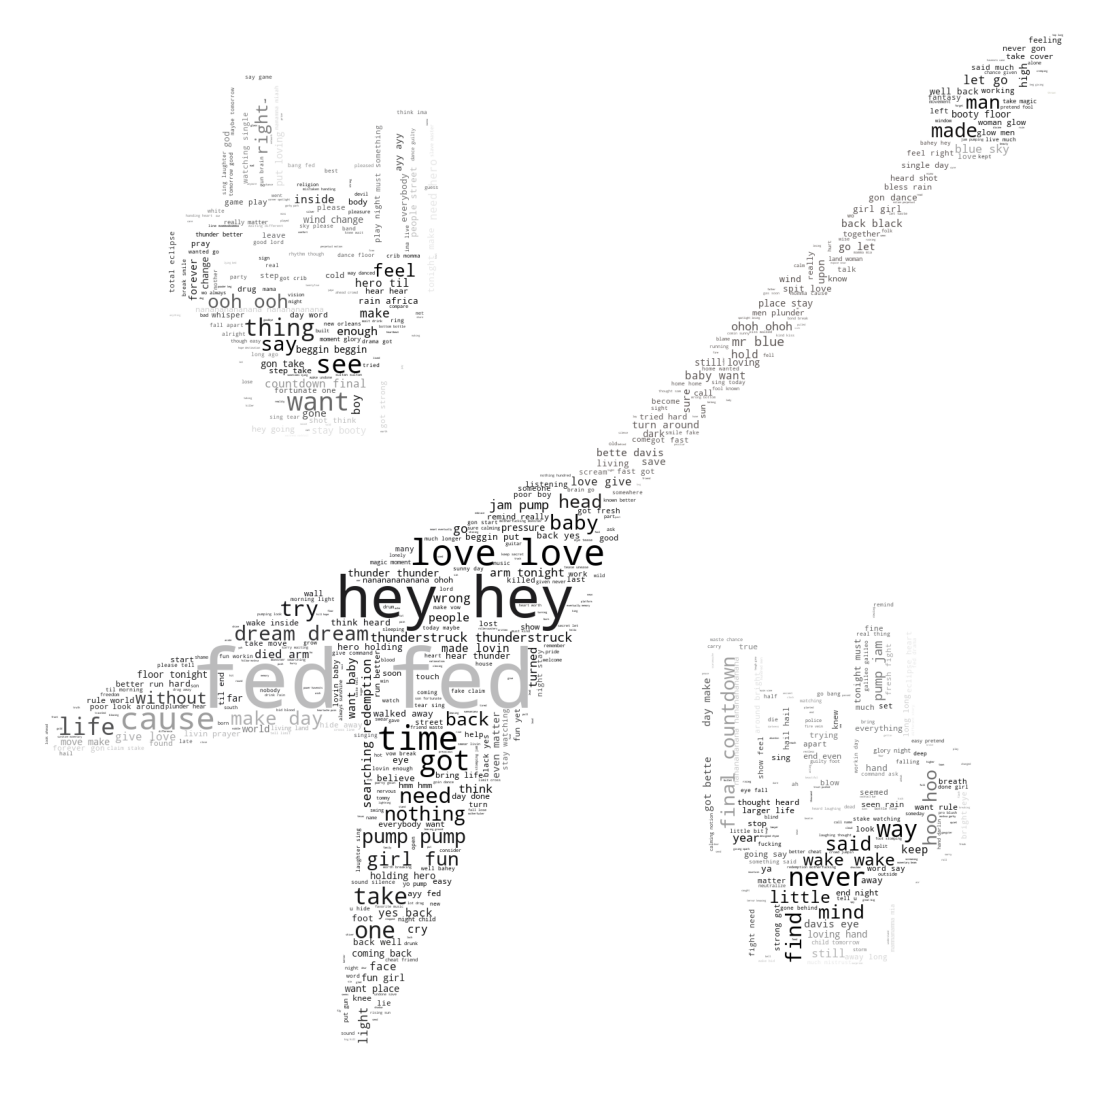

In [ ]:
# Generate the Rockin' wordcloud
lyrics_words_joined = ' '.join(lyrics_processed)

mask = np.array(Image.open("Images/guitar_4.jpg"))

wccc = WordCloud(background_color="white", max_words=2000, mask=mask, max_font_size=120, random_state=42, width=2000, height=1200, contour_color='black')


# generate word cloud
wccc.generate(lyrics_words_joined)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(20,20))
plt.imshow(wccc.recolor(color_func=image_colors), interpolation="bilinear")

plt.axis("off")
plt.imshow(wccc)

# Save image as png
wccc.to_file("images/Rock.png")

# NER - Spacy
In this section, we build a named entity recognition model for the Rock lyrics, then visualize the tags using SpaCy.

In [ ]:
# import spacy
import spacy
# from spacy import displacy
from spacy import displacy
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Run the NER processor on all of the text
rock_ner = nlp(lyrics_text)

# Add a title to the document
rock_ner.user_data['title'] = 'Rock NER'
displacy.render(rock_ner, style='ent')

In [ ]:
# List all Entities

ent_labels=[]
entities=[]

for ent in rock_ner.ents:
    ent_labels.append(ent.label_)
    entities.append(ent.text)

# Obtain frequency for each named entity

entities_freq = pd.DataFrame.from_dict([Counter(entities)]).T
entities_freq.columns = ['Frequency']
entities_freq.sort_values(by= 'Frequency', ascending=False, inplace = True)


# Retrieve labels for unique named entities

unique_nes = entities_freq.index.tolist()

labels = []

for word in unique_nes:
    idx = entities.index(word)
    label = ent_labels[idx]
    labels.append(label)

entities_freq['Label'] = labels

entities_freq

,Frequency,Label
Fed,28,ORG
tonight,23,TIME
tomorrow,10,DATE
Bette Davis,9,PERSON
Hail,8,PERSON
...,...,...
Greta Garbo,1,PERSON
New York,1,GPE
Harlow,1,NORP
Whoo,1,PERSON


In [ ]:
# Bar chart of frequencies of Named Entities

entities_count = pd.DataFrame.from_dict([Counter(ent_labels)]).T
entities_count.columns = ['Count']

entities_count.sort_values('Count',inplace=True, ascending=False)

entities_count.reset_index(inplace=True)
entities_count = entities_count.rename(columns = {'index':'Named_Entity'})

entities_count.head()

,Named_Entity,Count
0,PERSON,85
1,ORG,55
2,DATE,36
3,TIME,33
4,GPE,18


In [ ]:
fig = px.bar(
    entities_count,
    x="Named_Entity",
    y="Count",
    color = "Count",
    color_continuous_scale='earth',
    title = "Top Named Entities found in Rock Songs"
     )
fig.show()

In [ ]:
# Export Entities dataframe to CSV
entities_count.to_csv('Rock_entity_count.csv', index=False)

# Build a Markov Chain Function
We are going to build a simple Markov chain function that creates a dictionary:

- The keys should be all of the words in the corpus
- The values should be a list of the words that follow the keys

In [ ]:
from collections import defaultdict

def markov_chain(text):
    '''The input is a string of text and the output will be a dictionary with each word as
       a key and each value as the list of words that come after the key in the text.'''
    
    # Tokenize the text by word, though including punctuation
    words = text.split(' ')
#     for t in text:
#         words = t.split(' ')
#         print(words[0])
    
    # Initialize a default dictionary to hold all of the words and next words
    m_dict = defaultdict(list)
    
    # Create a zipped list of all of the word pairs and put them in word: list of next words format
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)

    # Convert the default dict back into a dictionary
    m_dict = dict(m_dict)
    return m_dict

In [ ]:
# Text generation function
def generate_sentence(chain, count=15):
    '''Input a dictionary in the format of key = current word, value = list of next words
       along with the number of words you would like to see in your generated sentence.'''

    # Capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    # Generate the second word from the value list. Set the new word as the first word. Repeat.
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    # End it with a period
    sentence += '.'
    return(sentence)

In [ ]:
# Create the dictionary for lyrics, take a look at it
# lyrics_dict = new_lyrics_df['Lyrics_str'].apply(markov_chain)

lyrics_dict = markov_chain(lyrics_text)

In [ ]:
#lines = []
#line = []

#num_sentences=32

#with open('markov_Rock.txt', 'w') as file:
#    file.write('Rock Song by Markov Chains')
#    file.write('\n')
#    file.write('------------------------------------------')
#    file.write('\n')
#
#    for num in range(0,num_sentences):
#        line = generate_sentence(lyrics_dict)
#        lines.append(line)
#        file.write(line)
#        file.write('\n')

# Create a Text Generator
We're going to create a function that generates sentences. It will take two things as inputs:

- The dictionary you just created
- The number of words you want generated

In [ ]:
import random

def generate_sentence(chain, count=8):
    '''Input a dictionary in the format of key = current word, value = list of next words
       along with the number of words you would like to see in your generated sentence.'''

    # Capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    # Generate the second word from the value list. Set the new word as the first word. Repeat.
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    # End it with a period
    sentence += '.'
    return(sentence)

In [ ]:
# Tokenize lyrics corpus
lyrics_corpus = list(lyrics_df['Lyrics'].apply(word_tokenize))
n = 4
train_data, padded_sents = padded_everygram_pipeline(n, lyrics_corpus)
# Train and fit the model
Rock_model = MLE(n) # Lets train a 4-grams model
Rock_model.fit(train_data, padded_sents)

In [ ]:
# Clean up the generated tokens to make it human-like.

detokenize = TreebankWordDetokenizer().detokenize

def generate_sent(model, num_words, random_seed):
    """
    :param model: An ngram language model from `nltk.lm.model`.
    :param num_words: Max no. of words to generate.
    :param random_seed: Seed value for random.
    """
    content = []
    for token in model.generate(num_words, random_seed=random_seed):
        if token == '<s>':
            continue
        if token == '</s>':
            break
        content.append(token)
    return detokenize(content)

In [ ]:
# Predict text
mle_text = generate_sent(Rock_model, num_words=500, random_seed=10)
len(mle_text)  

In [ ]:
with open('Rock_mle.txt', 'w', encoding="utf-8") as file:
    file.write(mle_text)

In [ ]:
mle_text

In [ ]:
mle_lyrics = [s for s in re.split("([A-H-J-Z][^A-H-J-Z]*)", mle_text) if s]
mle_lyrics

# Generate Audio from MLE Lyrics

In [ ]:
from gtts import gTTS 
import os
speech = gTTS(text = mle_text, lang = 'en', slow = True)
speech.save("mle_lyrics_Rock.mp4")